In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Impoting warnings to ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# STEP 1: A) Reading and understanding of data


In [3]:
# Reading csv data file
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# for better understanding rename some of columns

df.rename(columns={'mnth':'month', 'yr':'year', 'hum':'humidity'}, inplace = True)

In [10]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# copy the df into new dataframe
df_copy = df.copy()

In [12]:
df_copy.shape

(730, 16)

In [13]:
# dropping duplicates
df_copy.drop_duplicates(inplace = True)

In [14]:
# reverify shape of new dataframe after dropping duplicates
df_copy.shape

(730, 16)

In [15]:

# drop the unwanted columns
# 1) instant column dropped because it has only row number values
# 2) dteday column dropped because we replaced it by month and year columns
# 3) as cnt is sum of casual and registerd hence, both are dropped

df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

season column has numerical values between 1 to 4.

we need to map these numbers to respective seasons, so these column values will be used to generate dummy variables

Map this season column as-  1:spring, 2:summer, 3:fall, 4:winter

In [16]:
# converting numeric values of some columns into categorical values
# mapping 

# four seasons of year namely spring, summer, fall and winter

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# 1 to 12 values for year are converted into respective month names

df.month = df.month.map({1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'})

In [18]:
# 0 to 6 values for week are converted into respective weekday names

df.weekday = df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [19]:
# similarly for weathersit column

df.weathersit = df.weathersit.map({1:'clear_sky', 2:'foggy', 3:'light_snowfall', 4:'heavy_snowfall'})

In [20]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,foggy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,foggy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600


# STEP 1: B) Data visualisation

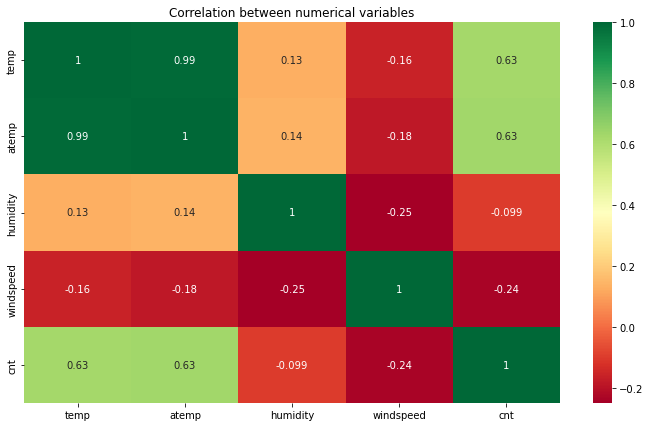

In [21]:
# 1) visualising the correlation between numerical variables

plt.figure(figsize = (12,7))
sns.heatmap(df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot = True, cmap = 'RdYlGn')
plt.title('Correlation between numerical variables')
plt.show()


**correlation between numerical variables from above heatmap**
1) There is multicollinearity between temp and atemp therefore these two coudnot be used for model analysis

2) From p-values and VIF of each variable we will decide which will be used for model analysis later

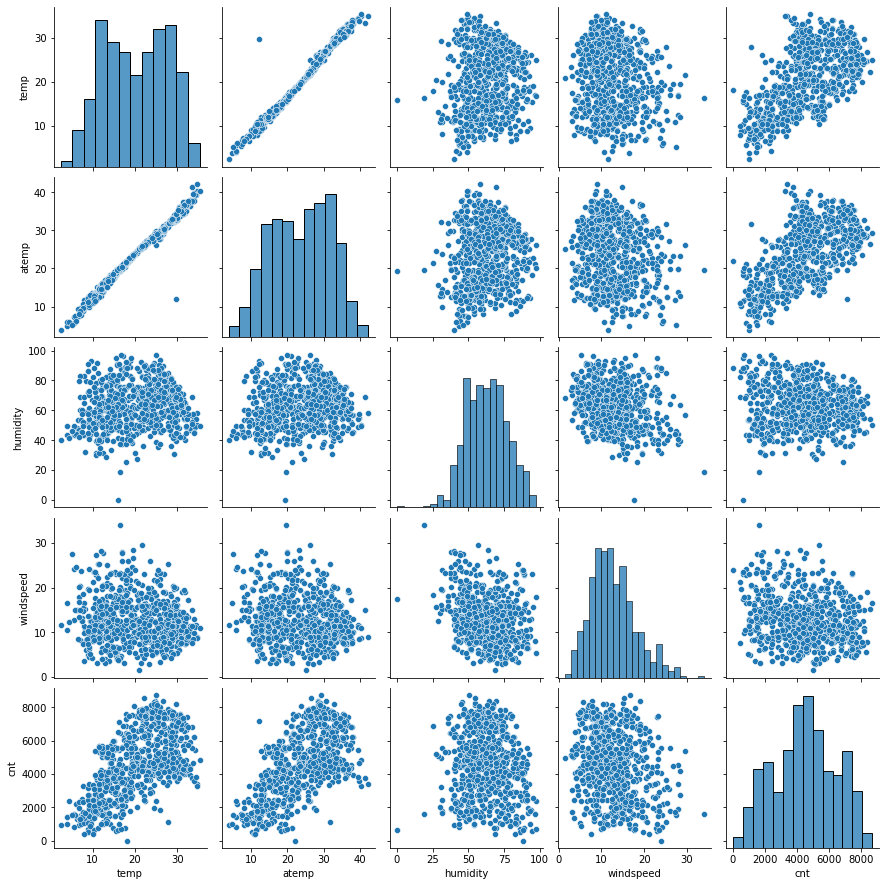

In [22]:
# 2) visualising the correlation between numerical variables by using a pairplot

sns.pairplot(vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt'], data = df)
plt.show()

**From above plot it seems that:**

1) Demand of bikes(cnt) value is **linearly dependent** on temp and atemp 

2) Humidity and windspeed doesnot show any specific behaviour with demand of bikes(cnt) on just visualising the data


Text(0.5, 1.0, '(7)-Demand of bikes(cnt) vs weathersit')

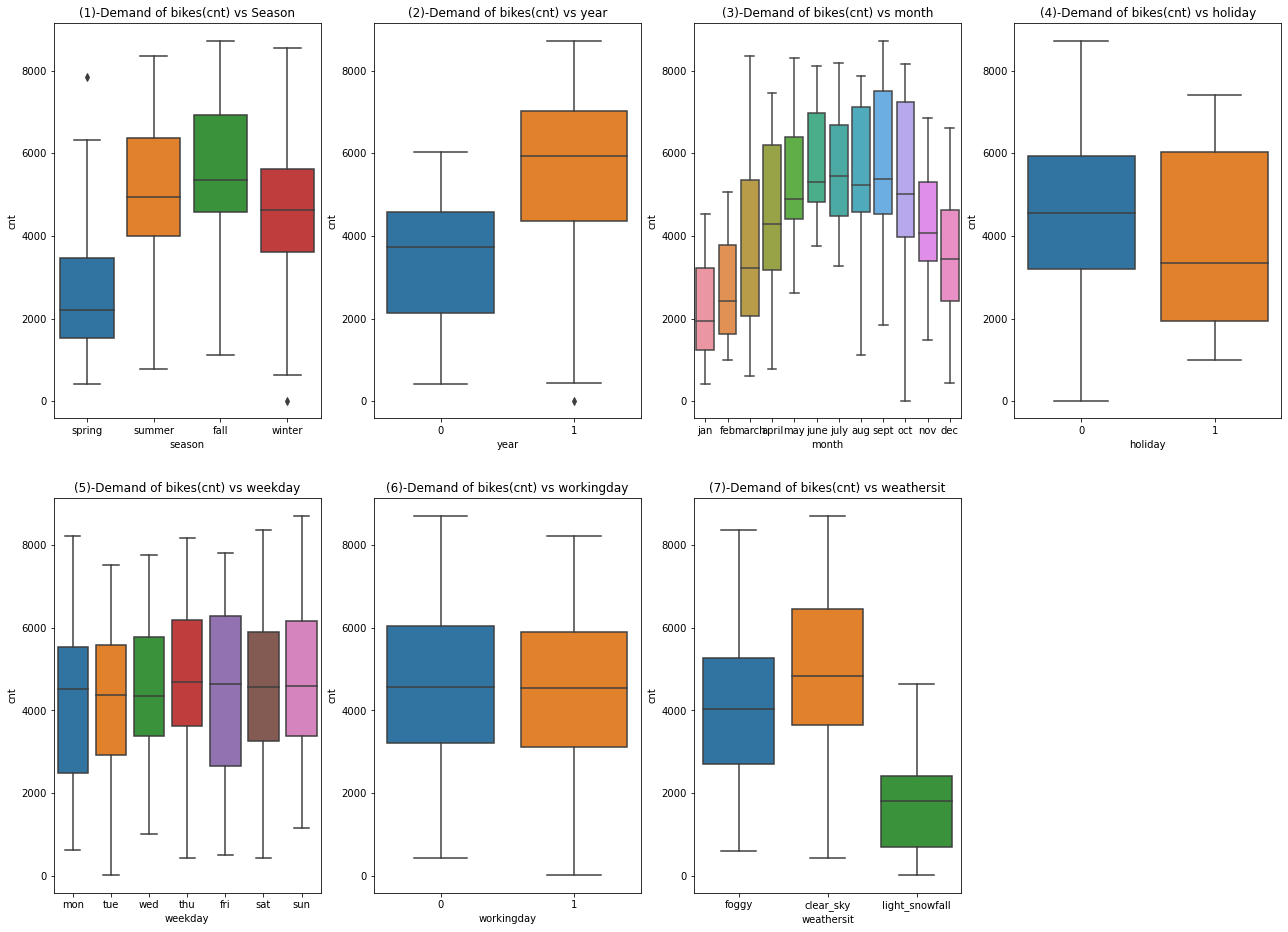

In [23]:
# 3) visualising the correlation between categorical variables by using a boxplot

plt.figure(figsize = (22,16))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.title('(1)-Demand of bikes(cnt) vs Season')

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.title('(2)-Demand of bikes(cnt) vs year')

plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.title('(3)-Demand of bikes(cnt) vs month')

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.title('(4)-Demand of bikes(cnt) vs holiday')

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.title('(5)-Demand of bikes(cnt) vs weekday')

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.title('(6)-Demand of bikes(cnt) vs workingday')

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.title('(7)-Demand of bikes(cnt) vs weathersit')

**From above plot it seems that**

1) Fall season shows highest number of demand of bikes(cnt), and distribution is quite different so season might act as an decisive factor for predicting target variable

2) Demand of bikes is increases largely in 2019 as compared to 2018, so it might be also decisive factor

3) Demand of bikes increases from month may to sept(comparitively clear_sky weathersit in USA), (comapritively summer+fall seasons in USA)

4) Demand of bikes for holiday is more as compare to working day

5) clear_sky_weathersit shows highest number of bike demand

# **STEP 2: Data preperation for modelling**

**A) Encoding** 

**B) train-test split** 

**C) scaling**

**A) Encoding**

In [24]:
# A) Encoding the remaining categorical variables to dummy variables

season_df = pd.get_dummies(df['season'])

month_df = pd.get_dummies(df['month'])

weekday_df = pd.get_dummies(df['weekday'])

weathersit_df = pd.get_dummies(df['weathersit'])

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,foggy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,foggy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Dropping redundant dummy variables

season_df = pd.get_dummies(df['season'], drop_first = True)

month_df = pd.get_dummies(df['month'], drop_first = True)

weekday_df = pd.get_dummies(df['weekday'], drop_first = True)

weathersit_df = pd.get_dummies(df['weathersit'], drop_first = True)

df.head()  

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,foggy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,foggy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear_sky,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear_sky,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear_sky,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# concat dummy dataframe with original one

df_new = pd.concat([df, season_df, month_df, weekday_df, weathersit_df], axis = 1)

df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sept,mon,sat,sun,thu,tue,wed,foggy,light_snowfall
0,spring,0,jan,0,mon,1,foggy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,jan,0,tue,1,foggy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,jan,0,wed,1,clear_sky,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear_sky,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear_sky,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# dropping unnecessary columns

df_new.drop(['season', 'month', 'weekday', 'weathersit'], axis = 1, inplace = True)

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,foggy,light_snowfall
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


**B) train-test split**

**We split the data into two parts**


1.   **Train data** (On this model will be build and it is almost 70% of total data)
2.   **Test data** (On this model will be tested and it is almost 30% of total data)



In [28]:
import sklearn
from sklearn.model_selection import train_test_split

In [29]:
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [30]:
print(df_train.shape)

(510, 30)


In [31]:
print(df_test.shape)

(220, 30)


**C) Scaling(MinMax scaling)**

In [32]:
# Rescaling the features

from sklearn.preprocessing import MinMaxScaler

In [33]:
# first - instantiate an object 

scaler = MinMaxScaler()

In [34]:
# second - fit the data

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,foggy,light_snowfall
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,1,0


# STEP 3: Training the model (Building the model)

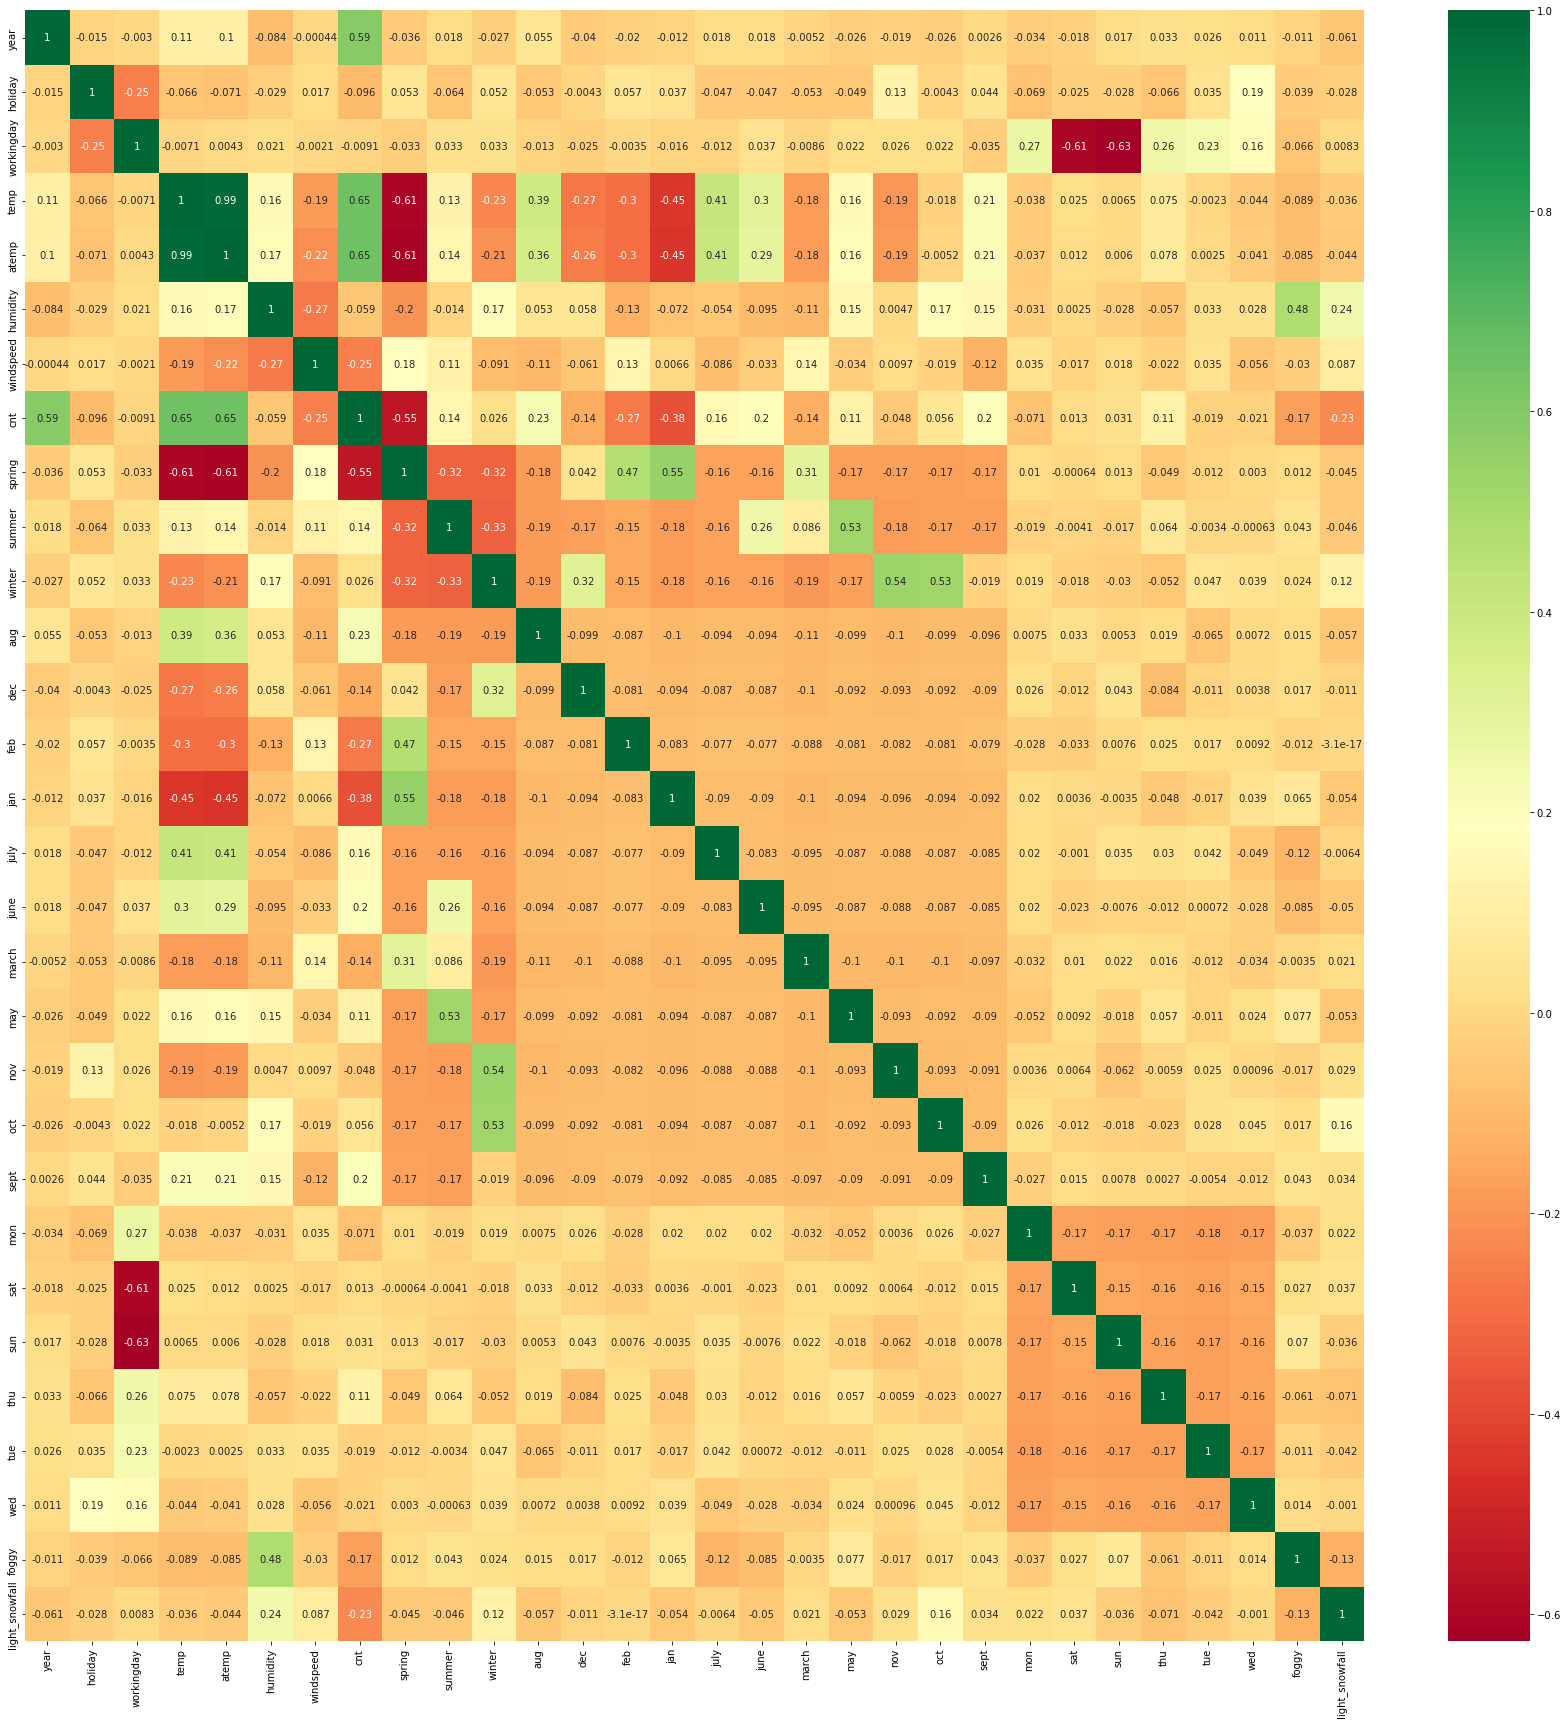

In [36]:
# correlation using heatmap

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

**from above heatmap it seems that:**

1) summer season with may_month shows good correlation

2) oct and nov months shows good correlation with winter season

3) spring season shows good correlation with jan and feb months

4) year and temp variables shows good correlation with cnt(target variable)

In [37]:
# Building a linear model

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
# Recursive Feature Elimination(RFE)-Variable selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('march', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('foggy', True, 1),
 ('light_snowfall', True, 1)]

In [41]:
# selected variables using RFE in column list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sept', 'foggy',
       'light_snowfall'],
      dtype='object')


In [42]:
# checking rejected columns

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'march', 'may', 'oct',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

**Building linear model using statsmodel for detailed statistics**

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# create X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# finding the VIF values of variables

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
13,foggy,2.32
0,year,2.09
11,nov,1.85
9,jan,1.75


**Building 1st model**

In [46]:
import statsmodels.api as sm

In [47]:
# add constant 

X_train_lm_1 = sm.add_constant(X_train_rfe)

In [48]:
# creating a model and a fit

lm_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [49]:
# summary

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        15:50:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [50]:
# Now, humidity variable has high VIF value so drop humidity

X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

In [51]:
# finding VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
12,foggy,1.57


**Building 2nd model**

In [52]:
# add constant 

X_train_lm_2 = sm.add_constant(X_train_new)

In [53]:
# creating a model and a fit

lm_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [54]:
# summary

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        15:50:25   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [55]:
# Now, based on high p-value drop nov month as it has highest p-value

X_train_new = X_train_new.drop(['nov'], axis = 1)

In [56]:
# FINDING VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,jan,1.65
9,july,1.59
11,foggy,1.57
10,sept,1.34


**Build 3rd model**

In [57]:
# add constant 

X_train_lm_3 = sm.add_constant(X_train_new)

In [58]:
# creating a model and a fit

lm_3 = sm.OLS(y_train, X_train_lm_3).fit()

In [59]:
# summary

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          2.74e-186
Time:                        15:50:31   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

In [60]:
 # Now, based on high p-value drop dec month as it has highest p-value

 X_train_new = X_train_new.drop(['dec'], axis = 1)

In [61]:
# FINDING VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,jan,1.61
8,july,1.59
10,foggy,1.56
9,sept,1.34


**Build 4th model**

In [62]:
# add constant 

X_train_lm_4 = sm.add_constant(X_train_new)

In [63]:
# creating a model and a fit

lm_4 = sm.OLS(y_train, X_train_lm_4).fit()

In [64]:
# summary

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          8.14e-187
Time:                        15:50:36   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [65]:
 # Now, based on high p-value drop jan month as it has highest p-value

 X_train_new = X_train_new.drop(['jan'], axis = 1)

In [66]:
# FINDING VIF
vif = pd.DataFrame()
vif['features'] =  X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
9,foggy,1.55
8,sept,1.34
10,light_snowfall,1.08


**Build 5th model**

In [67]:
# add constant 

X_train_lm_5 = sm.add_constant(X_train_new)

In [68]:
# creating a model and a fit

lm_5 = sm.OLS(y_train, X_train_lm_5).fit()

In [69]:
# summary

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          5.06e-187
Time:                        15:50:41   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [70]:
 # Now, based on high p-value drop july month as it has highest p-value

 X_train_new = X_train_new.drop(['july'], axis = 1)

In [71]:
# FINDING VIF
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,foggy,1.55
7,sept,1.23
9,light_snowfall,1.08
1,holiday,1.04


**Building 6th model**

In [72]:
# add constant 

X_train_lm_6 = sm.add_constant(X_train_new)

In [73]:
# creating a model and a fit

lm_6 = sm.OLS(y_train, X_train_lm_6).fit()

In [74]:
# summary

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.47e-186
Time:                        15:50:46   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

**From above 6th model, it seems that**


1.   VIF values for all variables are below 5
2.   p-values for all predictor variables are also very low, hence they all are significant for this model
3.   R-squared value for this 6th model is 0.833, which is very good





**Therefore, above 6th model is our FINAL MODEL**

# STEP 4: Residual Analysis and Predictions


**A.  Residual Analysis of train data
B. Predictions and evaluations on test set**



**A.  Residual Analysis of train data**

In [75]:
# finding predicted value of the target variable

y_train_pred = lm_6.predict(X_train_lm_6)

y_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

In [76]:
# finding residual or error terms

res = y_train - y_train_pred

res

576    0.052435
426    0.000884
728   -0.184374
482   -0.086460
111   -0.091885
         ...   
578    0.022812
53     0.002265
350    0.051365
79    -0.080323
520    0.161107
Length: 510, dtype: float64

# Assumptions of linear regression
**i) Checking the normal distribution of error terms**

Text(0.5, 0, 'Error values')

<Figure size 432x288 with 0 Axes>

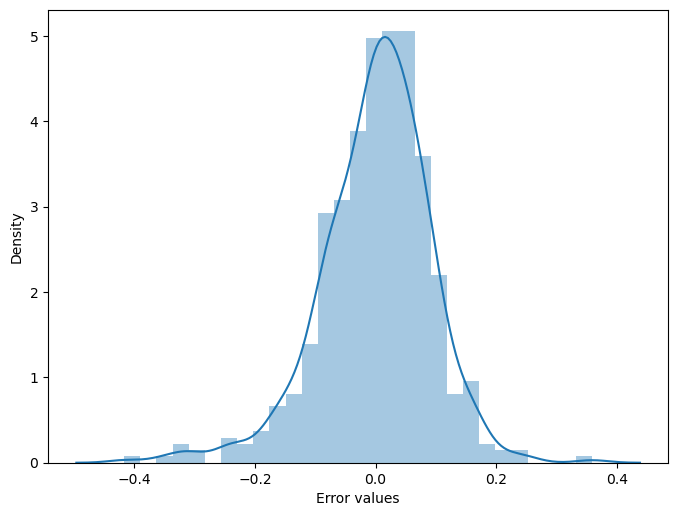

In [77]:
# checking the normallity of error terms

from matplotlib.pyplot import figure
fig = plt.figure()
figure(figsize = (8,6), dpi = 100)
sns.distplot(res)

fig.suptitle('Distribution of Error terms')
plt.xlabel('Error values')

from above histogram is seems that, Error terms follows **Normal distribution** and **centered around zero**

**ii) checking the independency of error terms**

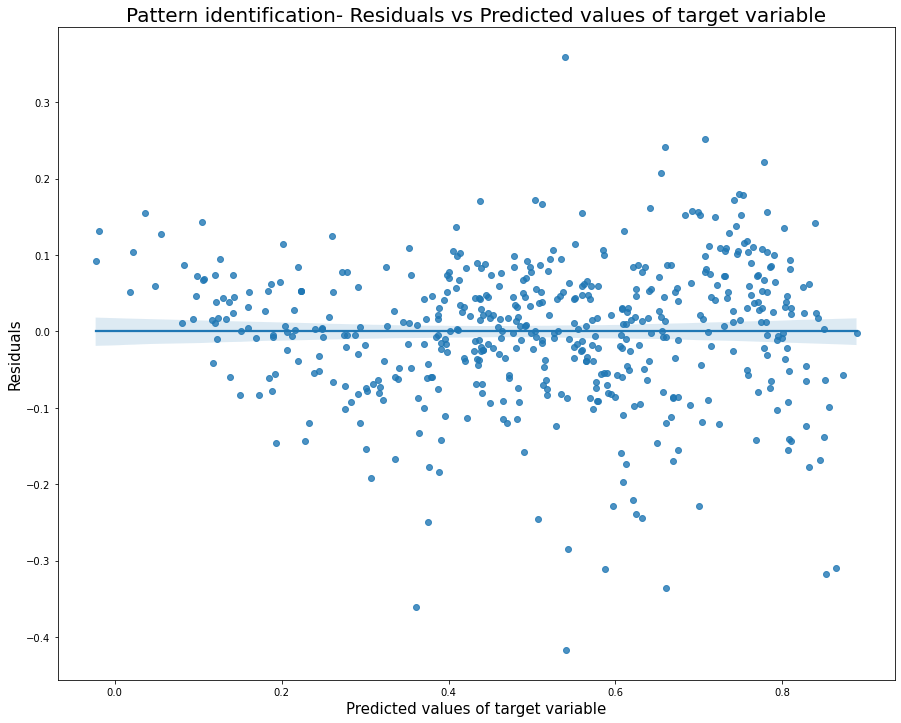

In [78]:
# checking the independency of error terms

fig = sns.regplot(x = y_train_pred, y = res)
plt.title('Pattern identification- Residuals vs Predicted values of target variable', fontsize = 20)
plt.xlabel('Predicted values of target variable', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
fig.figure.set_size_inches(15,12)

plt.show()

From above graph it seems that there is no any specific pattern between residuals and target variable values, that is what we are expecting

**iii) Homoscedacity**

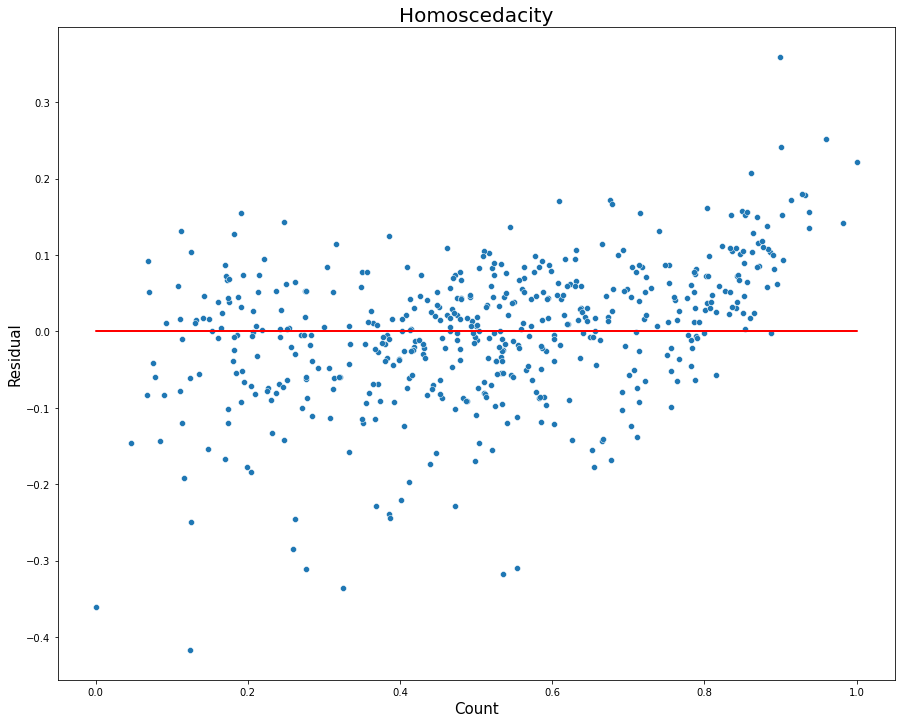

In [79]:
fig = sns.scatterplot(x = y_train, y = res)
plt.plot(y_train, (y_train - y_train), '-r')
plt.title('Homoscedacity', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Residual', fontsize = 15)
fig.figure.set_size_inches(15,12)

plt.show()

From plot, we observe that error values have **constant variance**.
 We **don't** observe high or low concentration of data in some specific region

**iv) Multicolinearity**

In [80]:
# first checking VIF values of train data set
vif = pd.DataFrame()
vif['features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,foggy,1.55
7,sept,1.23
9,light_snowfall,1.08
1,holiday,1.04


**VIF values for predictor variables of final model are also less than 5**

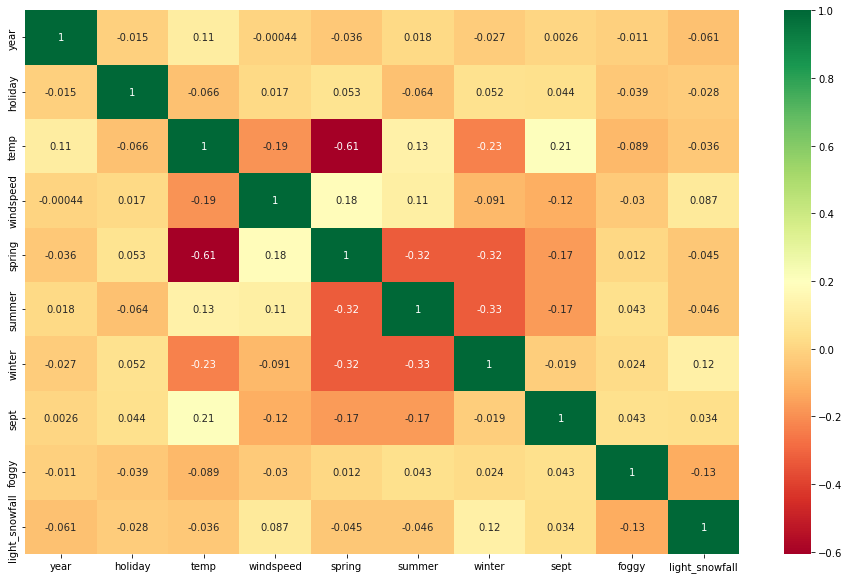

In [81]:
# secondly, plot heatmap of train data set of final 6th model

plt.figure(figsize = (16,10))
sns.heatmap(X_train_new.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

**from above heat map, it is proovd that there is no multicollinearity between variables**

# B. Predictions and evaluations on test set**

In [82]:
# Creating a list of numerical variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

In [83]:
# fit on data ( we never use fit() on test set hence, we transform() the test data set)

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,foggy,light_snowfall
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [84]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,foggy,light_snowfall
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From above table it seems that, max values of all are not exactly one ( while in training dataset those were 1)

In [85]:
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
col1 = X_train_new.columns
X_test = X_test[col1]

In [87]:
# add a constant

X_test_lm_6 = sm.add_constant(X_test)
X_test_lm_6.head()

,const,year,holiday,temp,windspeed,spring,summer,winter,sept,foggy,light_snowfall
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [88]:
# prediction

y_test_pred = lm_6.predict(X_test_lm_6)

In [89]:
# evaluate

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
r2

0.8038195990728844

In [90]:
# calculating adjusted R2 for test data set

adjusted_r2 = round(1 - (1 - r2) * (X_test.shape[0] - 1)/ (X_test.shape[0] - X_test.shape[1] - 1), 4)
adjusted_r2

0.7944

# STEP 5: SUMMARY

**R2 and Adjusted R2 values comparison**

1) R2 for train data set is 0.833 

2) R2 for test data set is 0.8038

3) Adjusted R2 for train data set is 0.829

4) Adjusted R2 for test data set is 0.7944

from above values it seems that, R2 values for train and test data set are close to each other,

similarly adjusted R2 values for train and test data set are also close to each other.

Therefore what model is learned in training dataset able to generalise very well on test data set also

In [91]:
# coefficient values for final model predictor variables 
lm_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
spring           -0.055406
summer            0.062076
winter            0.094476
sept              0.090998
foggy            -0.078741
light_snowfall   -0.285031
dtype: float64

In [92]:
round(lm_6.params, 4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
spring           -0.0554
summer            0.0621
winter            0.0945
sept              0.0910
foggy            -0.0787
light_snowfall   -0.2850
dtype: float64

# The equation of best fit line is 

**cnt =  0.1909 + ( 0.2341* year) - ( 0.0963* holiday) + ( 0.4777* temp) - (0.1481* windspeed) - (0.0554* spring) + (0.0621* summer) + (0.0945* winter) + (0.0910* sept) - (0.0787* foggy) - (0.2850* light_snowfall)**


# *Demand of bikes depends on year, holiday, temperature, windspeed, spring_season, summer_season, winter_season, september_month, foggy_weathersit and light_snowfall_weatherit*